In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/kaggle/input/salary/Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Split the dataset into Independent(X) and Dependent(y) Variables

In [4]:
X = df.iloc[:, :-1].values    # Features => Years of experience => Independent Variable
y = df.iloc[:, -1].values     # Target => Salary => Dependent Variable

X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [5]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

### Divide the complete dataset into training and testing data

In [6]:
# divide the dataset in some amount of training and testing data
from sklearn.model_selection import train_test_split

# random_state => seed value used by random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Implement Classifier based on Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test)
predictions

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

In [9]:
y_test

array([121872,  91738,  66029, 122391, 101302,  67938,  63218,  37731,
        55794, 112635, 105582])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

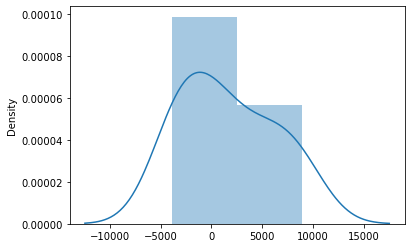

In [10]:
import seaborn as sns
sns.distplot(predictions-y_test)

### Plotting the Best-fit Linear Regression Graph

* Formula for the Linear Regression : Salary = B0 + B1*(Experience)
* B0 = intercept => salary when experience is 0, B1 = slope => increase in salary with unit increase in salary

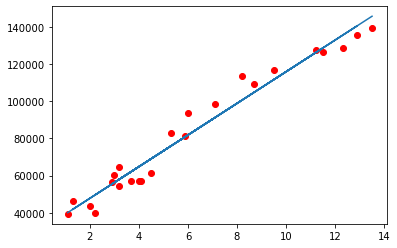

In [11]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train))